<a href="https://colab.research.google.com/github/abdullatif14/Twitter-Sentiment-Analysis/blob/main/Copy_of_Final_Twitter_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Defining the Question**

**Kenya Power is the only supplier of Electricity in Kenya. As such,they receive a lot of feedback on their social media channels. One of those channels is Twitter. We will attempt to build a Sentiment Analysis Model on the Twitter feedback and interactions involving Kenya Power.**

## **Defining Metrics for Success**

**A succesful model will be able to fetch/ scrape Twitter data involving Kenya Power, convert and import the text data into a Pandas DataFrame, pre-process the data by refining it into forms that Natural language Processing can be done. The model should also attach appropriate sentiments to individual tweets in the range of Positive, Neutral and Negative sentiments.A succesful model will also try to build a Neural Network classifier for future Sentiment analysis problems.**

## **Understanding The context.**

**The context in this project is an NLP (Natural Language Processing) context. We would have to research NLP concepts from basic to advanced inorder to build a better Sentiment Analysis Model.**

## **Experimental Design**

**For this project, we will first scrape the appropriate Twitter data before storing it in a Pandas DataFrame. We will then preprocess the data before attaching appropriate sentiments sing NLTK ( Natural Language Toolkit) libraries. We will then build a classifier model for future Sentiment Analysis.**

## **Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/content/twint
Processing /content/twint
     |████████████████████████████████| 1.3MB 4.0MB/s 
     |████████████████████████████████| 266kB 27.7MB/s 
     |████████████████████████████████| 348kB 24.7MB/s 
     |████████████████████████████████| 143kB 29.5MB/s 
     |████████████████████████████████| 296kB 23.5MB/s 
     |████████████████████████████████| 266kB 24.3MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=3ccef4c0b338ef35b3749737d0c946eefd2fa78017f5198debefc4a64a1497af
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp37-none-any.whl size=1597

In [ ]:
import twint

In [ ]:
import nest_asyncio
nest_asyncio.apply()# used once to enable concurrent actions within a Jupyter notebook.

## **Fetching the Data**

**Fetch Tweets**
 > **Here we will use Twint which is a twitter scrapping tool.**

In [ ]:
c = twint.Config()
c.Lang = "en"
c.Search = 'KenyaPower_Care'
c.Since = '2021-02-01'
c.until= '2021-05-12'
c.Limit = 4000
c.Pandas = True
c.Images= True
c.Vidoes = True
c.Media = True

twint.run.Search(c)

Tweets_df = twint.storage.panda.Tweets_df

1392436838116339716 2021-05-12 11:09:47 +0000 <emasika> @KenyaPower_Care See below  https://t.co/ucWO3Ermvi
1392427581698449408 2021-05-12 10:33:00 +0000 <kangethe_kangs> @KenyaPower_Care No Electricity in Toll weighbridge Thika Road since morning. Alafu kuna cable imekatika karibu na transformer  https://t.co/eexeowRA7v
1392425904090107906 2021-05-12 10:26:20 +0000 <fabzology369> @sponjy_ @mutuahkiilu @KenyaPower_Care News: Raining at TAMBACH  Please run for a rescue before it mess up with the power line hanging on a tree around Tambach Poster. Sparking profusely  Hio miti ikatwe 🕑on time @KenyaPower  🔌B4 it happens like Last time walipoteza Electronic supplies due, HVoltage  https://t.co/rvNbkTfVg4
1392425671125872643 2021-05-12 10:25:24 +0000 <fabzology369> @citizentvkenya @KenyaPower_Care News: Raining at TAMBACH  Please run for a rescue before it mess up with the power line hanging on a tree around Tambach Poster. Sparking profusely  Hio miti ikatwe 🕑on time @KenyaPower  🔌B4 it ha

In [ ]:
Tweets_df.shape

(4096, 38)

In [ ]:
Tweets_df.tail(100)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
3996,1372906047661346828,1372901189138976776,1.616161e+12,2021-03-19 13:41:23,+0000,,Does anyone have an affordable home solar powe...,en,[],[],217710561,217710561,bapfrancis,Franco,5,13,https://twitter.com/bapfrancis/status/13729060...,[],[https://pbs.twimg.com/media/Ew2KxO7WQAUTZSX.jpg],1,https://pbs.twimg.com/media/Ew2KxO7WQAUTZSX.jpg,False,4,5,4,,KenyaPower_Care,,,,,,,[],,,,
3997,1372890498369720325,1369935850855931906,1.616158e+12,2021-03-19 12:39:36,+0000,,"@KenyaPower_Care For the fourth day, can you k...",en,[],[],462649426,462649426,AntonyTripple,The Boy Child,5,12,https://twitter.com/AntonyTripple/status/13728...,[],[https://pbs.twimg.com/media/Ew18hqvWgAARc9H.png],1,https://pbs.twimg.com/media/Ew18hqvWgAARc9H.png,False,0,0,0,,KenyaPower_Care,,,,,,,"[{'screen_name': 'KenyaPower_Care', 'name': 'K...",,,,
3998,1372890295667462145,1372890295667462145,1.616158e+12,2021-03-19 12:38:48,+0000,,Residents of Kwa Ndiuku in Ngoliba Thika East ...,en,[],[],3433852323,3433852323,ThikaTowntoday,Thika Town Today - 3T,5,12,https://twitter.com/ThikaTowntoday/status/1372...,[],[https://pbs.twimg.com/media/Ew18b97WUAMkuNm.jpg],1,https://pbs.twimg.com/media/Ew18b97WUAMkuNm.jpg,False,3,0,3,,KenyaPower_Care,,,,,,,[],,,,
3999,1372873965119635464,1372707248368128002,1.616154e+12,2021-03-19 11:33:54,+0000,,"@KenyaPower_Care No power up to now, @KenyaPow...",en,[],[],2768993853,2768993853,mawaludm,joans,5,11,https://twitter.com/mawaludm/status/1372873965...,[],[https://pbs.twimg.com/media/Ew1tmESWYAMpHgJ.jpg],1,https://pbs.twimg.com/media/Ew1tmESWYAMpHgJ.jpg,False,0,1,0,,KenyaPower_Care,,,,,,,"[{'screen_name': 'KenyaPower_Care', 'name': 'K...",,,,
4000,1372867307446411268,1372447648641339392,1.616152e+12,2021-03-19 11:07:27,+0000,,@DeeKerubo @KenyaPower_Care @KenyaPower Oh you...,en,[],[],109241864,109241864,duniainamambo,Omuombo Atieno,5,11,https://twitter.com/duniainamambo/status/13728...,[],[https://pbs.twimg.com/media/Ew1niDrWgAA3BeT.jpg],1,https://pbs.twimg.com/media/Ew1niDrWgAA3BeT.jpg,False,0,0,0,,KenyaPower_Care,,,,,,,"[{'screen_name': 'DeeKerubo', 'name': 'Mrs. Ki...",,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,1372282850406510593,1372259479186780168,1.616013e+12,2021-03-17 20:25:01,+0000,,@ritwa_riakwa Good evening. For a power outage...,en,[],[],147561402,147561402,KenyaPower_Care,Kenya Power,3,20,https://twitter.com/KenyaPower_Care/status/137...,[],[https://pbs.twimg.com/media/EwtT-S9W8AgV5VG.jpg],1,https://pbs.twimg.com/media/EwtT-S9W8AgV5VG.jpg,False,0,0,0,,KenyaPower_Care,,,,,,,"[{'screen_name': 'ritwa_riakwa', 'name': 'Fion...",,,,
4092,1372282616519528449,1372258382338531330,1.616013e+12,2021-03-17 20:24:06,+0000,,@Nyamori_Joshua @KenyaPower @kenyapower_ Good ...,en,[],[],147561402,147561402,KenyaPower_Care,Kenya Power,3,20,https://twitter.com/KenyaPower_Care/status/137...,[],[https://pbs.twimg.com/media/EwtTww9WgAI78pY.jpg],1,https://pbs.twimg.com/media/EwtTww9WgAI78pY.jpg,False,0,0,0,,KenyaPower_Care,,,,,,,"[{'screen_name': 'Nyamori_Joshua', 'name': 'Jo...",,,,
4093,1372281871254577157,1372258220652294147,1.616012e+12,2021-03-17 20:21:08,+0000,,@steveondego Check your inbox. ^SW https://t....,en,[],[],147561402,147561402,KenyaPower_Care,Kenya Power,3,20,https://twitter.com/KenyaPower_Care/status/137...,[],[https://pbs.twimg.com/media/EwtTFVfWEAUZwHJ.jpg],1,https://pbs.twimg.com/media/EwtTFVfWEAUZwHJ.jpg,False,0,0,0,,KenyaPower_Care,,,,,,,"[{'screen_name': 'steveondego', 'name': 'VIKOB...",,,,
4094,1372280683054391297,1372257849108217866,1.616012e+12,2021-03-17 20:16:25,+0000,,@Liez_Liz Check your inbo

## **External Data Validation**

**We validated the fetched data by cross-checking tweets and dates in our dataset to those on the Twitter platform and confirmed authenticity of our data.**

## **Data Pre-Processing and Modelling**

In [ ]:
Tweets_df.language.value_counts()

en     3476
und     411
in      100
tl       61
et       16
es        8
pl        6
ht        4
it        3
fi        2
fr        2
lt        1
de        1
da        1
ro        1
tr        1
lv        1
hi        1
Name: language, dtype: int64

In [ ]:
# Here we specify the en tweets only, might not be so accurate since we are using
# Twint
Tweets_df = Tweets_df.loc[Tweets_df['language'] == 'en']


In [ ]:
# Importing html to visualize sample tweets

from IPython.display import HTML
import requests

def show_tweet(link):
    '''Display the contents of a tweet. '''
    url = 'https://publish.twitter.com/oembed?url=%s' % link
    response = requests.get(url)
    html = response.json()["html"]
    display(HTML(html))

In [ ]:
sample_tweet_link = Tweets_df.sample(1)['link'].values[0]
display(sample_tweet_link)
show_tweet(sample_tweet_link)

'https://twitter.com/Ma3Route/status/1379121570828931072'

In [ ]:
Tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
# Dropping irrelevant columns
Tweets_df = Tweets_df.drop(['id', 'conversation_id', 'created_at', 'date','timezone', 'place', 'language','hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], axis = 1)

In [ ]:
Tweets_df.head()

,tweet
0,@KenyaPower_Care See below https://t.co/ucWO3...
2,@sponjy_ @mutuahkiilu @KenyaPower_Care News: R...
3,@citizentvkenya @KenyaPower_Care News: Raining...
4,@MakaveliKe @NRGRadioKenya @iamdaryakish @Shaq...
5,@Nairobi_News @KenyaPower_Care News: Raining a...


### **Fetch Sentiments Using NTLK Sentiment analyzer(Vader)**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Now we’ll add columns to the original DataFrame to store polarity_score dictionaries, extracted compound scores, and new labels derived from the compound score. The sentiments in this method will be classified into negative, positive and, neutral ratio.

In [ ]:
Tweets_df['scores'] = Tweets_df['tweet'].apply(lambda Description: sid.polarity_scores(Description))
Tweets_df.head()

,tweet,scores
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@sponjy_ @mutuahkiilu @KenyaPower_Care News: R...,"{'neg': 0.048, 'neu': 0.795, 'pos': 0.157, 'co..."
3,@citizentvkenya @KenyaPower_Care News: Raining...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com..."
4,@MakaveliKe @NRGRadioKenya @iamdaryakish @Shaq...,"{'neg': 0.045, 'neu': 0.809, 'pos': 0.146, 'co..."
5,@Nairobi_News @KenyaPower_Care News: Raining a...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com..."


In [ ]:
# Compound score evaluation and giving the sentiments labels

Tweets_df['compound'] = Tweets_df['scores'].apply(lambda score_dict: score_dict['compound'])
Tweets_df['sentiment_type']=''
Tweets_df.loc[Tweets_df.compound>0,'sentiment_type']='Positive'
Tweets_df.loc[Tweets_df.compound==0,'sentiment_type']='Neutral'
Tweets_df.loc[Tweets_df.compound<0,'sentiment_type']='Negative'

In [ ]:
Tweets_df.tail(50)

,tweet,scores,compound,sentiment_type
4046,@SummerJossy Check your inbox. ^SW https://t....,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4047,@increasethekick Good morning. Please share a ...,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.8689,Positive
4048,@KiratheMk Good morning. There is a pending co...,"{'neg': 0.142, 'neu': 0.693, 'pos': 0.166, 'co...",0.2023,Positive
4049,@Dun35146647 @ENERGYKENYA Good morning. We are...,"{'neg': 0.05, 'neu': 0.802, 'pos': 0.147, 'com...",0.6369,Positive
4050,@JacksonNdungu7 Good morning. For a power outa...,"{'neg': 0.044, 'neu': 0.827, 'pos': 0.129, 'co...",0.4939,Positive
4051,@kimtito1 Check your inbox. ^SW https://t.co/...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4052,The attached areas are planned for power inter...,"{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...",-0.4019,Negative
4053,@Tangai001 Good morning. We are addressing a f...,"{'neg': 0.051, 'neu': 0.798, 'pos': 0.15, 'com...",0.6369,Positive
4054,@paulinewamuyu13 Thank you too for the update ...,"{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...",0.6597,Positive
4055,@PK3102 Good morning. We are following up on p...,"{'neg': 0.053, 'neu': 0.791, 'pos': 0.156, 'co...",0.6369,Positive


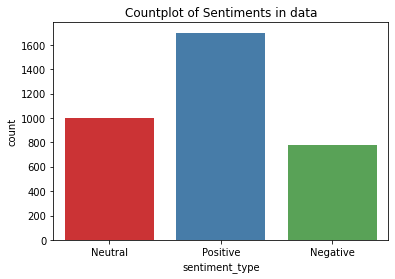

<Figure size 800x800 with 0 Axes>

In [ ]:
# Displaying the sentiments on a countplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'sentiment_type',data = Tweets_df,palette='Set1' )
plt.title('Countplot of Sentiments in data')
plt.figure(figsize=(8,8),dpi=100)
plt.show()


In [ ]:
# Frequency table
Tweets_df.sentiment_type.value_counts()

Positive    1698
Neutral     1001
Negative     777
Name: sentiment_type, dtype: int64

### **Text Pre-Processing using key words**

In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [ ]:
# # We are keeping cleaned tweets in a new column called 'tidy_tweets'
Tweets_df['tidy_tweets'] = np.vectorize(remove_pattern)(Tweets_df['tweet'],"@[\w]*")
Tweets_df.head(10)

,tweet,scores,compound,sentiment_type,tidy_tweets
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,See below https://t.co/ucWO3Ermvi
2,@sponjy_ @mutuahkiilu @KenyaPower_Care News: R...,"{'neg': 0.048, 'neu': 0.795, 'pos': 0.157, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a ...
3,@citizentvkenya @KenyaPower_Care News: Raining...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a r...
4,@MakaveliKe @NRGRadioKenya @iamdaryakish @Shaq...,"{'neg': 0.045, 'neu': 0.809, 'pos': 0.146, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run fo...
5,@Nairobi_News @KenyaPower_Care News: Raining a...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a r...
6,@Tuko_co_ke @MOH_Kenya @WilliamsRuto @KenyaPow...,"{'neg': 0.048, 'neu': 0.798, 'pos': 0.154, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a...
7,@KenyaPower_Care News: Raining at TAMBACH Ple...,"{'neg': 0.05, 'neu': 0.786, 'pos': 0.163, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a re...
8,@KenyaPower_Care News: Raining at TAMBACH Res...,"{'neg': 0.053, 'neu': 0.825, 'pos': 0.123, 'co...",0.5106,Positive,News: Raining at TAMBACH Rescue before it me...
9,@KenyaPower_Care how long do it takes to supp...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,how long do it takes to supply electricity. ...
10,@KenyaPower_Care @KenyaPowerAlert should I D...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,should I DM this too? It has taken you two...


In [ ]:
# # Removing links (http | https)

cleaned_tweets = []

for index, row in Tweets_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

Tweets_df['tidy_tweets'] = cleaned_tweets
Tweets_df.head(10)

,tweet,scores,compound,sentiment_type,tidy_tweets
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,See below
2,@sponjy_ @mutuahkiilu @KenyaPower_Care News: R...,"{'neg': 0.048, 'neu': 0.795, 'pos': 0.157, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...
3,@citizentvkenya @KenyaPower_Care News: Raining...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...
4,@MakaveliKe @NRGRadioKenya @iamdaryakish @Shaq...,"{'neg': 0.045, 'neu': 0.809, 'pos': 0.146, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...
5,@Nairobi_News @KenyaPower_Care News: Raining a...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...
6,@Tuko_co_ke @MOH_Kenya @WilliamsRuto @KenyaPow...,"{'neg': 0.048, 'neu': 0.798, 'pos': 0.154, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...
7,@KenyaPower_Care News: Raining at TAMBACH Ple...,"{'neg': 0.05, 'neu': 0.786, 'pos': 0.163, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...
8,@KenyaPower_Care News: Raining at TAMBACH Res...,"{'neg': 0.053, 'neu': 0.825, 'pos': 0.123, 'co...",0.5106,Positive,News: Raining at TAMBACH Rescue before it mess...
9,@KenyaPower_Care how long do it takes to supp...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,how long do it takes to supply electricity. I ...
10,@KenyaPower_Care @KenyaPowerAlert should I D...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,should I DM this too? It has taken you two weeks.


In [ ]:
# # Removing tweets with empty text
Tweets_df = Tweets_df[Tweets_df['tidy_tweets']!='']
Tweets_df.head(5)

,tweet,scores,compound,sentiment_type,tidy_tweets
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,See below
2,@sponjy_ @mutuahkiilu @KenyaPower_Care News: R...,"{'neg': 0.048, 'neu': 0.795, 'pos': 0.157, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...
3,@citizentvkenya @KenyaPower_Care News: Raining...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...
4,@MakaveliKe @NRGRadioKenya @iamdaryakish @Shaq...,"{'neg': 0.045, 'neu': 0.809, 'pos': 0.146, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...
5,@Nairobi_News @KenyaPower_Care News: Raining a...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...


In [ ]:
# # Drop duplicate rows

Tweets_df.drop_duplicates(subset=['tidy_tweets'], keep=False)
Tweets_df.head(1)

,tweet,scores,compound,sentiment_type,tidy_tweets
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,See below


In [ ]:
# Resetting index
# It seems that our index needs to be reset, since after removal of some rows, some index values are missing,
#  which may cause problem in future operations.

Tweets_df = Tweets_df.reset_index(drop=True)
Tweets_df.head(1)

,tweet,scores,compound,sentiment_type,tidy_tweets
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,See below


Removing Punctuations, Numbers and Special characters
This step should not be followed if we also want to do sentiment analysis on key phrases as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on key words.

In [ ]:
Tweets_df['absolute_tidy_tweets'] = Tweets_df['tidy_tweets'].str.replace("[^a-zA-Z#@ ]", "")

In [ ]:
Tweets_df.head()

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,See below,See below
1,@sponjy_ @mutuahkiilu @KenyaPower_Care News: R...,"{'neg': 0.048, 'neu': 0.795, 'pos': 0.157, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining at TAMBACH Please run for a rescu...
2,@citizentvkenya @KenyaPower_Care News: Raining...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining at TAMBACH Please run for a rescu...
3,@MakaveliKe @NRGRadioKenya @iamdaryakish @Shaq...,"{'neg': 0.045, 'neu': 0.809, 'pos': 0.146, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining at TAMBACH Please run for a rescu...
4,@Nairobi_News @KenyaPower_Care News: Raining a...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining at TAMBACH Please run for a rescu...


Removing Stop words
With the same reason we mentioned above, we won't perform this on 'tidy_tweets' column, because it needs to be used for key_phrases sentiment analysis.

In [ ]:
stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in Tweets_df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
Tweets_df['absolute_tidy_tweets'] = cleaned_tweets
Tweets_df.head(10)

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,See below,See
1,@sponjy_ @mutuahkiilu @KenyaPower_Care News: R...,"{'neg': 0.048, 'neu': 0.795, 'pos': 0.157, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
2,@citizentvkenya @KenyaPower_Care News: Raining...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
3,@MakaveliKe @NRGRadioKenya @iamdaryakish @Shaq...,"{'neg': 0.045, 'neu': 0.809, 'pos': 0.146, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
4,@Nairobi_News @KenyaPower_Care News: Raining a...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
5,@Tuko_co_ke @MOH_Kenya @WilliamsRuto @KenyaPow...,"{'neg': 0.048, 'neu': 0.798, 'pos': 0.154, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
6,@KenyaPower_Care News: Raining at TAMBACH Ple...,"{'neg': 0.05, 'neu': 0.786, 'pos': 0.163, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
7,@KenyaPower_Care News: Raining at TAMBACH Res...,"{'neg': 0.053, 'neu': 0.825, 'pos': 0.123, 'co...",0.5106,Positive,News: Raining at TAMBACH Rescue before it mess...,News Raining TAMBACH Rescue mess power line ha...
8,@KenyaPower_Care how long do it takes to supp...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,how long do it takes to supply electricity. I ...,long takes supply electricity I paid February ...
9,@KenyaPower_Care @KenyaPowerAlert should I D...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,should I DM this too? It has taken you two weeks.,I DM It taken two weeks


Tokenize *'absolute_tidy_tweets'*

In [ ]:
tokenized_tweet = Tweets_df['absolute_tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                                [See]
1    [News, Raining, TAMBACH, Please, run, rescue, ...
2    [News, Raining, TAMBACH, Please, run, rescue, ...
3    [News, Raining, TAMBACH, Please, run, rescue, ...
4    [News, Raining, TAMBACH, Please, run, rescue, ...
Name: absolute_tidy_tweets, dtype: object

 Converting words to Lemma

In [ ]:
word_lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0                                                [See]
1    [News, Raining, TAMBACH, Please, run, rescue, ...
2    [News, Raining, TAMBACH, Please, run, rescue, ...
3    [News, Raining, TAMBACH, Please, run, rescue, ...
4    [News, Raining, TAMBACH, Please, run, rescue, ...
Name: absolute_tidy_tweets, dtype: object

Joining all tokens into sentences

In [ ]:
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

Tweets_df['absolute_tidy_tweets'] = tokenized_tweet
Tweets_df.head(10)

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,See below,See
1,@sponjy_ @mutuahkiilu @KenyaPower_Care News: R...,"{'neg': 0.048, 'neu': 0.795, 'pos': 0.157, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
2,@citizentvkenya @KenyaPower_Care News: Raining...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
3,@MakaveliKe @NRGRadioKenya @iamdaryakish @Shaq...,"{'neg': 0.045, 'neu': 0.809, 'pos': 0.146, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
4,@Nairobi_News @KenyaPower_Care News: Raining a...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
5,@Tuko_co_ke @MOH_Kenya @WilliamsRuto @KenyaPow...,"{'neg': 0.048, 'neu': 0.798, 'pos': 0.154, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
6,@KenyaPower_Care News: Raining at TAMBACH Ple...,"{'neg': 0.05, 'neu': 0.786, 'pos': 0.163, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...
7,@KenyaPower_Care News: Raining at TAMBACH Res...,"{'neg': 0.053, 'neu': 0.825, 'pos': 0.123, 'co...",0.5106,Positive,News: Raining at TAMBACH Rescue before it mess...,News Raining TAMBACH Rescue mess power line ha...
8,@KenyaPower_Care how long do it takes to supp...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,how long do it takes to supply electricity. I ...,long take supply electricity I paid February m...
9,@KenyaPower_Care @KenyaPowerAlert should I D...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,should I DM this too? It has taken you two weeks.,I DM It taken two week


### **Key Phrases** 

 Pre-processing 'Key Phrases'

In [ ]:
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        """Normalises words to lowercase and stems and lemmatizes it."""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

 Grammatical rule to identify phrases

In [ ]:
sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

 New feature called 'key_phrases', will contain phrases for corresponding tweet

In [ ]:

key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in Tweets_df.iterrows(): 
    toks = nltk.regexp_tokenize(row.tidy_tweets, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)
    
key_phrases[:10]

[[],
 ['news',
  ' tam bach please',
  'rescue',
  'power line',
  'tree',
  'tambach poster',
  'hio miti ikatwe',
  'time',
  'last time',
  'electronic supply',
  'oltage'],
 ['news',
  ' tam bach please',
  'rescue',
  'power line',
  'tree',
  'tambach poster',
  'hio miti ikatwe',
  'time',
  'last time',
  'electronic supply',
  'oltage'],
 ['news',
  ' tam bach please',
  'rescue',
  'power line',
  'tree',
  'tambach poster',
  'hio miti ikatwe',
  'time',
  'last time',
  'electronic supply',
  'oltage'],
 ['news',
  ' tam bach please',
  'rescue',
  'power line',
  'tree',
  'tambach poster',
  'hio miti ikatwe',
  'time',
  'last time',
  'electronic supply',
  'oltage'],
 ['news',
  ' tam bach please',
  'rescue',
  'power line',
  'tree',
  'tambach poster',
  'hio miti ikatwe',
  'time',
  'last time',
  'electronic supply',
  'oltage'],
 ['news',
  ' tam bach please',
  'rescue',
  'power line',
  'tree',
  'tambach poster',
  'hio miti ikatwe',
  'time cable',
  'last 

Adding the key phrases extracted to our Dataframe

In [ ]:
Tweets_df['key_phrases'] = key_phrases
Tweets_df.head(10)

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets,key_phrases
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,See below,See,[]
1,@sponjy_ @mutuahkiilu @KenyaPower_Care News: R...,"{'neg': 0.048, 'neu': 0.795, 'pos': 0.157, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
2,@citizentvkenya @KenyaPower_Care News: Raining...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
3,@MakaveliKe @NRGRadioKenya @iamdaryakish @Shaq...,"{'neg': 0.045, 'neu': 0.809, 'pos': 0.146, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
4,@Nairobi_News @KenyaPower_Care News: Raining a...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
5,@Tuko_co_ke @MOH_Kenya @WilliamsRuto @KenyaPow...,"{'neg': 0.048, 'neu': 0.798, 'pos': 0.154, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
6,@KenyaPower_Care News: Raining at TAMBACH Ple...,"{'neg': 0.05, 'neu': 0.786, 'pos': 0.163, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
7,@KenyaPower_Care News: Raining at TAMBACH Res...,"{'neg': 0.053, 'neu': 0.825, 'pos': 0.123, 'co...",0.5106,Positive,News: Raining at TAMBACH Rescue before it mess...,News Raining TAMBACH Rescue mess power line ha...,"[news, tam bach rescue, power line, tree, tam..."
8,@KenyaPower_Care how long do it takes to supp...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,how long do it takes to supply electricity. I ...,long take supply electricity I paid February m...,"[electricity, february, meter]"
9,@KenyaPower_Care @KenyaPowerAlert should I D...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,should I DM this too? It has taken you two weeks.,I DM It taken two week,[week]


Story Generation and Visualization

In [ ]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Most common words in positive tweets

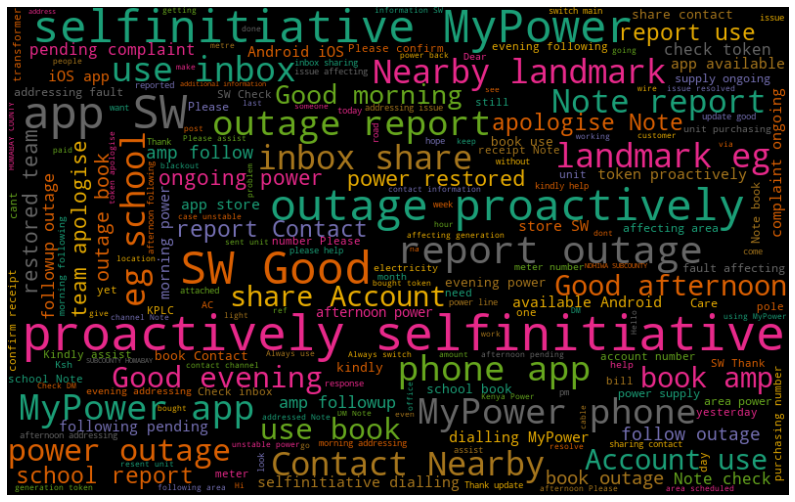

In [ ]:
all_words = ' '.join([text for text in Tweets_df['absolute_tidy_tweets'][Tweets_df.sentiment_type == 'Positive']])
generate_wordcloud(all_words)

 Most common words in negative tweets









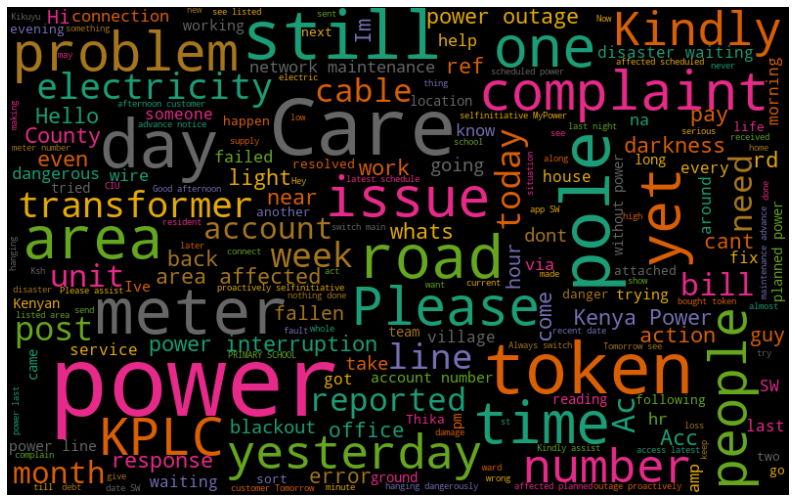

In [ ]:
all_words = ' '.join([text for text in Tweets_df['absolute_tidy_tweets'][Tweets_df.sentiment_type == 'Negative']])
generate_wordcloud(all_words)

 Most common words in neutral tweets



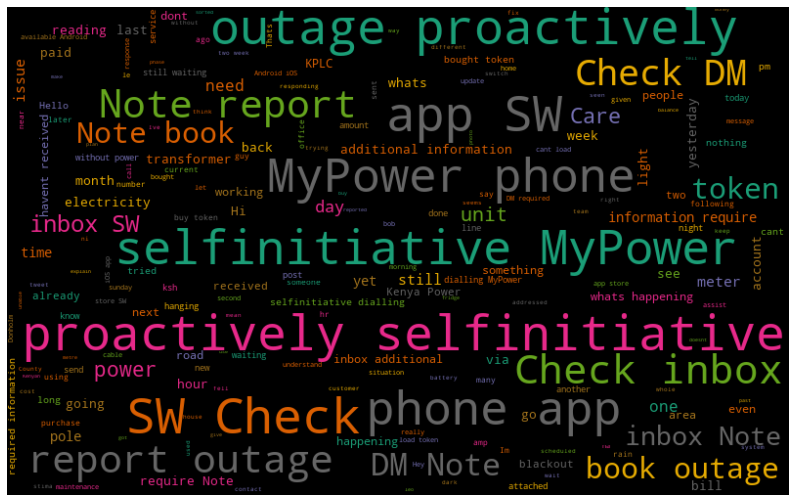

In [ ]:
all_words = ' '.join([text for text in Tweets_df['absolute_tidy_tweets'][Tweets_df.sentiment_type == 'Neutral']])
generate_wordcloud(all_words)

### **Classifier Modelling**

In [ ]:
# Tweets_df['sentiment_type'] = Tweets_df.sentiment_type.map({'Positive':1,'Negative':2,'Neutral':0})

In [ ]:
# Df copy incase
tweeter = Tweets_df.copy()
tweeter.head(1)

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets,key_phrases
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,See below,See,[]


In [ ]:
Tweets_df.head(50)

,tweet,scores,compound,sentiment_type,tidy_tweets,absolute_tidy_tweets,key_phrases
0,@KenyaPower_Care See below https://t.co/ucWO3...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,See below,See,[]
1,@sponjy_ @mutuahkiilu @KenyaPower_Care News: R...,"{'neg': 0.048, 'neu': 0.795, 'pos': 0.157, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
2,@citizentvkenya @KenyaPower_Care News: Raining...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
3,@MakaveliKe @NRGRadioKenya @iamdaryakish @Shaq...,"{'neg': 0.045, 'neu': 0.809, 'pos': 0.146, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
4,@Nairobi_News @KenyaPower_Care News: Raining a...,"{'neg': 0.049, 'neu': 0.791, 'pos': 0.16, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
5,@Tuko_co_ke @MOH_Kenya @WilliamsRuto @KenyaPow...,"{'neg': 0.048, 'neu': 0.798, 'pos': 0.154, 'co...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
6,@KenyaPower_Care News: Raining at TAMBACH Ple...,"{'neg': 0.05, 'neu': 0.786, 'pos': 0.163, 'com...",0.6808,Positive,News: Raining at TAMBACH Please run for a resc...,News Raining TAMBACH Please run rescue mess po...,"[news, tam bach please, rescue, power line, t..."
7,@KenyaPower_Care News: Raining at TAMBACH Res...,"{'neg': 0.053, 'neu': 0.825, 'pos': 0.123, 'co...",0.5106,Positive,News: Raining at TAMBACH Rescue before it mess...,News Raining TAMBACH Rescue mess power line ha...,"[news, tam bach rescue, power line, tree, tam..."
8,@KenyaPower_Care how long do it takes to supp...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,how long do it takes to supply electricity. I ...,long take supply electricity I paid February m...,"[electricity, february, meter]"
9,@KenyaPower_Care @KenyaPowerAlert should I D...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,should I DM this too? It has taken you two weeks.,I DM It taken two week,[week]


#### Some more cleaning just to be sure before deploying our model

In [ ]:
# def preprocess_text(sen):
#     # Removing html tags
#     sentence = remove_tags(sen)

#     # Remove punctuations and numbers
#     sentence = re.sub('[^a-zA-Z]', ' ', sentence)

#     # Single character removal
#     sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

#     # Removing multiple spaces
#     sentence = re.sub(r'\s+', ' ', sentence)

#     return sentence

In [ ]:
# TAG_RE = re.compile(r'<[^>]+>')

# def remove_tags(text):
#     return TAG_RE.sub('', text)

In [ ]:
# X = []
# sentences = list(Tweets_df['absolute_tidy_tweets'])
# for sen in sentences:
#     X.append(preprocess_text(sen))

In [ ]:
# y = Tweets_df['sentiment_type'].values

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### TEST 1

In [ ]:
# split into X and Y
y = tweeter['sentiment_type']
X = tweeter['absolute_tidy_tweets']

print(X.shape)
print(y.shape)

# convert to numpy arrays
X = np.array(X)

(3476,)
(3476,)


In [ ]:
# show Y
y.head()

0     Neutral
1    Positive
2    Positive
3    Positive
4    Positive
Name: sentiment_type, dtype: object

In [ ]:

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Importing libraries for our neural network

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           210950    
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 15003     
Total params: 225,953
Trainable params: 15,003
Non-trainable params: 210,950
_________________________________________________________________
None


In [ ]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...



history = model.fit(X_train, y_train, batch_size=10,callbacks=[es], epochs=80, verbose=1, validation_split=0.2)


Epoch 1/80
223/223 [==============================] - 1s 3ms/step - loss: 0.8235 - acc: 0.5926 - val_loss: 0.6885 - val_acc: 0.6583
Epoch 2/80
223/223 [==============================] - 0s 2ms/step - loss: 0.6348 - acc: 0.7143 - val_loss: 0.6755 - val_acc: 0.6817
Epoch 3/80
223/223 [==============================] - 0s 2ms/step - loss: 0.5705 - acc: 0.7510 - val_loss: 0.6649 - val_acc: 0.6906
Epoch 4/80
223/223 [==============================] - 0s 2ms/step - loss: 0.5308 - acc: 0.7842 - val_loss: 0.6650 - val_acc: 0.6996
Epoch 5/80
223/223 [==============================] - 0s 2ms/step - loss: 0.5040 - acc: 0.8011 - val_loss: 0.6695 - val_acc: 0.7068
Epoch 6/80
223/223 [==============================] - 0s 2ms/step - loss: 0.4871 - acc: 0.7941 - val_loss: 0.6725 - val_acc: 0.6924
Epoch 7/80
223/223 [==============================] - 0s 2ms/step - loss: 0.4489 - acc: 0.8303 - val_loss: 0.6837 - val_acc: 0.6924
Epoch 8/80
223/223 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

22/22 [==============================] - 0s 2ms/step - loss: 0.6728 - acc: 0.6810


In [ ]:
print("Test Loss Score:", score[0])
print("Test Accuracy:", score[1])

Test Loss Score: 0.6728252172470093
Test Accuracy: 0.681034505367279


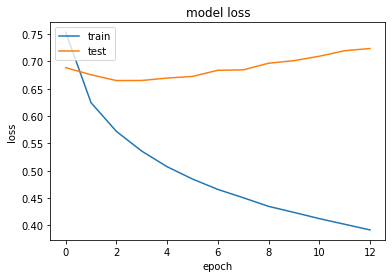

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

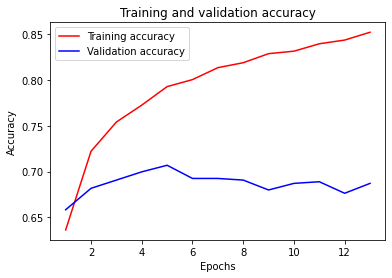

In [ ]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['acc']
val_acc = history_dict['val_acc']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### LSTM

In [ ]:
from keras.layers import LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 200)          840800    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               168448    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 1,009,635
Trainable params: 168,835
Non-trainable params: 840,800
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
18/18 [==============================] - 30s 46ms/step - loss: 1.0808 - acc: 0.4284 - val_loss: 1.0571 - val_acc: 0.4964
Epoch 2/20
18/18 [==============================] - 0s 15ms/step - loss: 1.0588 - acc: 0.4838 - val_loss: 1.0379 - val_acc: 0.4964
Epoch 3/20
18/18 [==============================] - 0s 15ms/step - loss: 1.0450 - acc: 0.4841 - val_loss: 1.0384 - val_acc: 0.4964
Epoch 4/20
18/18 [==============================] - 0s 15ms/step - loss: 1.0445 - acc: 0.4919 - val_loss: 1.0380 - val_acc: 0.4964
Epoch 5/20
18/18 [==============================] - 0s 15ms/step - loss: 1.0499 - acc: 0.4756 - val_loss: 1.0385 - val_acc: 0.4964
Epoch 6/20
18/18 [==============================] - 0s 15ms/step - loss: 1.0422 - acc: 0.4839 - val_loss: 1.0383 - val_acc: 0.4964
Epoch 7/20
18/18 [==============================] - 0s 14ms/step - loss: 1.0431 - acc: 0.4867 - val_loss: 0.9663 - val_acc: 0.4964
Epoch 8/20
18/18 [==============================] - 0s 15ms/step - loss: 0.9681 - 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

22/22 [==============================] - 0s 6ms/step - loss: 0.9634 - acc: 0.5632


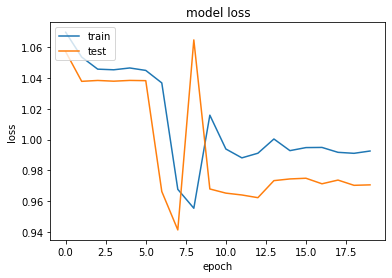

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## **Conclusion and Recommendations**



*   **Kenya Power needs to have a better approach of dealing with complaints    inorder to ensure better service delivery. This was observed by the influx of Negative comments and sentiments asscociated with tweets analysed.** 
* **Natural language processing and Sentiment Analysis involving African languages (eg.Swahili) needs to improve inorder to enable better accuracy and sentiment scoring of information involving non-english text. This was particularly a big problem for us and we had to filter only tweets in English , hence probably losing important information.**

